In [4]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
prosody_data = pd.read_csv('prosodic_features_M.csv ')

In [6]:
prosody_data.head()

,participant&question,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired2
0,P1Q1,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,...,138,274.562,257.247,25.872,20.106,91,4722.964842,5.106224,0,0
1,P1Q2,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,...,100,268.613,270.193,24.647,15.886,71,2928.482587,5.106224,0,0
2,P1Q3,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441736,120.457847,...,114,283.912,203.506,23.720,16.951,79,3528.448990,5.106224,0,0
3,P1Q4,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,...,55,100.655,83.172,13.148,5.044,36,1924.546685,5.106224,0,0
4,P1Q5,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,...,32,129.591,117.119,14.706,11.073,19,1322.366516,5.106224,0,0


In [7]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 62 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [8]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Hired,Hired2
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.00000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,146.933824,213.12020,211.117346,27.542576,21.547319,88.869118,5564.506801,4.950746,0.073529,0.139706
std,36.117420,0.012226,0.000130,8.332808,41.614286,41.921335,13.154095,76.500370,46.615600,0.795525,...,99.187955,52.57662,53.494882,7.688180,8.454734,59.178885,4357.018782,0.721579,0.261196,0.346937
min,10.341458,0.000176,0.000013,56.049663,222.555742,92.979514,12.053274,76.004974,82.801688,0.301339,...,17.000000,90.97700,74.731000,9.800000,5.044000,11.000000,79.872717,3.189661,0.000000,0.000000
25%,32.839339,0.002527,0.000065,71.320330,339.477409,124.543847,33.160269,196.724385,113.288462,0.736553,...,80.000000,172.86125,173.455250,22.295500,15.521250,47.750000,2712.929560,4.529477,0.000000,0.000000
50%,49.762437,0.005648,0.000119,73.929065,376.743832,180.010964,40.569432,247.524278,178.438806,1.035074,...,123.000000,206.67350,209.036500,27.070500,20.215500,76.000000,4520.700221,4.967754,0.000000,0.000000
75%,71.724484,0.013414,0.000221,75.644207,397.296921,203.342602,48.220307,293.743385,203.973193,1.350608,...,184.500000,256.15325,253.252250,32.177250,26.054000,112.250000,7249.827921,5.448852,0.000000,0.000000
max,376.992000,0.134692,0.000873,198.840510,424.360354,254.871233,97.363392,524.459680,247.959843,7.681538,...,995.000000,324.85300,323.517000,54.361000,53.887000,590.000000,40513.328260,6.647218,1.000000,1.000000


Text(0.5, 0, 'Recommend Hiring')

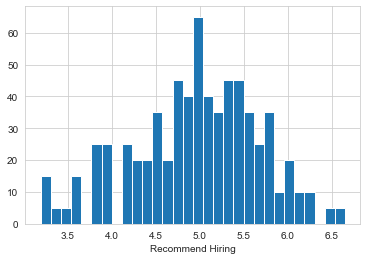

In [9]:
sns.set_style('whitegrid')
prosody_data['RecommendHiring'].hist(bins=30)
plt.xlabel('Recommend Hiring')

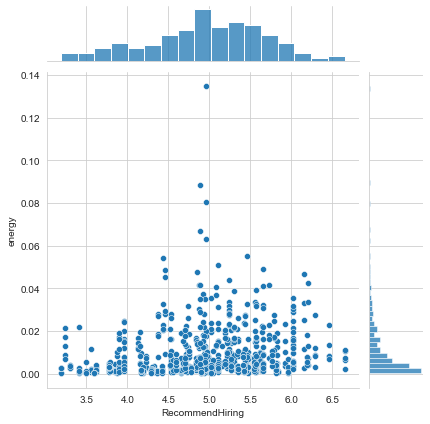

In [52]:
sns.jointplot(y='energy', x='RecommendHiring', data=prosody_data)

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=prosody_data['Hired'], cmap= 'plasma_r')
plt.ylabel('duration')
plt.xlabel('pitch_sd')

Text(0.5, 0, 'Recommend Hiring')

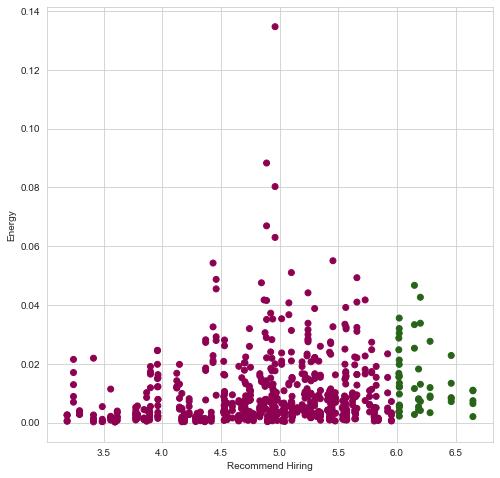

In [42]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data


dA = pd.read_csv('prosodic_features_M1.csv ')
y = prosody_data['RecommendHiring']
c1 = prosody_data['Hired']
x1 = prosody_data['energy']
x2 = prosody_data['speakRate']
x3 = prosody_data['avgBand1']

# Creating plot
fig = plt.figure(figsize=(8,8))


ax = plt.axes()

#Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis mako_r
plt.scatter(y,x1, c=c1, cmap= 'PiYG')
plt.ylabel('Energy')
plt.xlabel('Recommend Hiring')


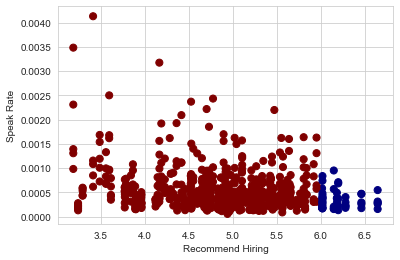

In [56]:
plt.scatter(y,x2,c=c1, cmap= 'jet_r',s=50)
plt.ylabel('Speak Rate')
plt.xlabel('Recommend Hiring')
plt.show()

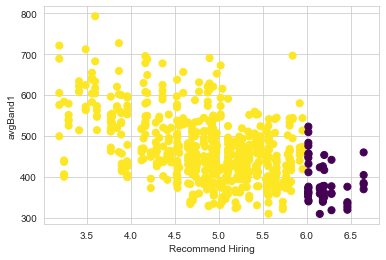

In [55]:

plt.scatter(y,x3,c=c1, cmap= 'viridis_r',s=50)
plt.ylabel('avgBand1')
plt.xlabel('Recommend Hiring')
plt.show()

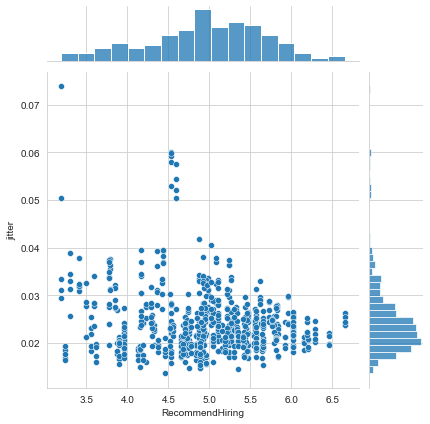

In [46]:
sns.jointplot(y='jitter', x='RecommendHiring', cmap= 'PiYG', data=prosody_data)

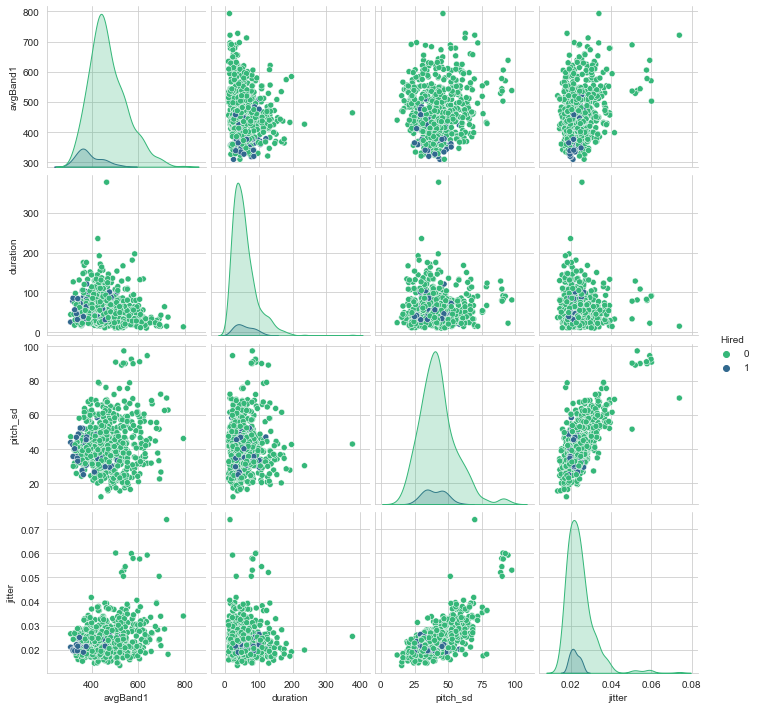

In [70]:
df1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'jitter','Hired']]
sns.pairplot(df1,hue='Hired',palette='viridis_r')

TypeError: __init__() got an unexpected keyword argument 'ticks'

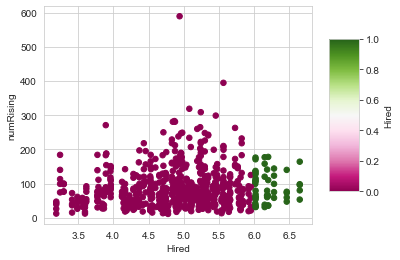

In [83]:
x4 =prosody_data['numRising']
    
plt.scatter(y,x4,c=c1, cmap= 'PiYG',s=30, label = c1)
plt.ylabel('numRising')
plt.xlabel('Hired')
plt.colorbar(shrink = 0.7,label = 'Hired', aspect = 5)
plt.legend(ticks=range(2))
plt.show()

<AxesSubplot:xlabel='avgBand1', ylabel='RecommendHiring'>

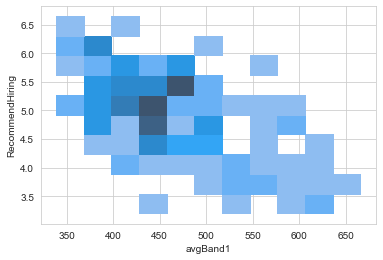

In [74]:
sns.histplot(x='avgBand1',y='RecommendHiring', data= dA)

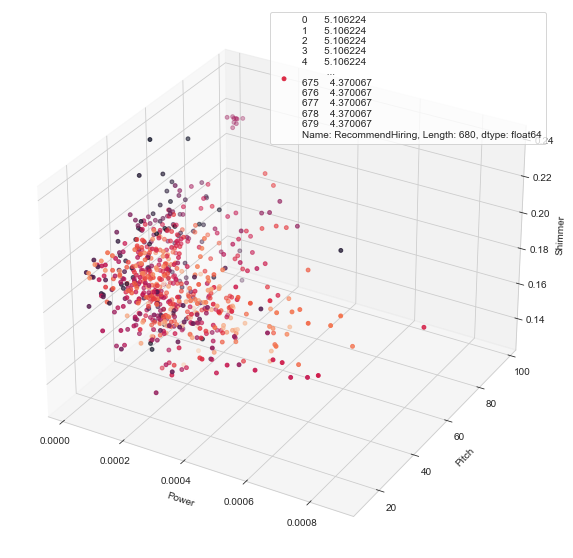

In [15]:
#3D-Graph

plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')


ax.scatter(prosody_data['power'],prosody_data['pitch_sd'],prosody_data['shimmer'],c=prosody_data['RecommendHiring'],s=15,label=prosody_data['RecommendHiring'])

ax.set_xlabel('Power')
ax.set_ylabel('Pitch')

ax.set_zlabel('Shimmer')
plt.legend()
plt.show()

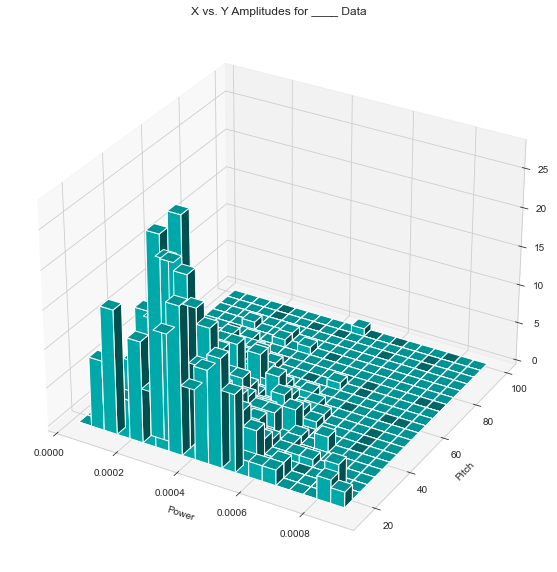

In [16]:
xAmplitudes = prosody_data['power']#your data here
yAmplitudes = prosody_data['pitch_sd']#your other data here
zAmplitudes = prosody_data['RecommendHiring']


x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)
z = np.array(zAmplitudes)
 
fig = plt.figure(figsize=(10,10))          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')
 
#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins= (20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
 
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
 
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0] 
dz = hist.flatten()
 

max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)



ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= 'c', zsort='average')
plt.title("X vs. Y Amplitudes for ____ Data")
plt.xlabel("Power")
plt.ylabel("Pitch")
plt.savefig("Your_title_goes_here")
plt.show()

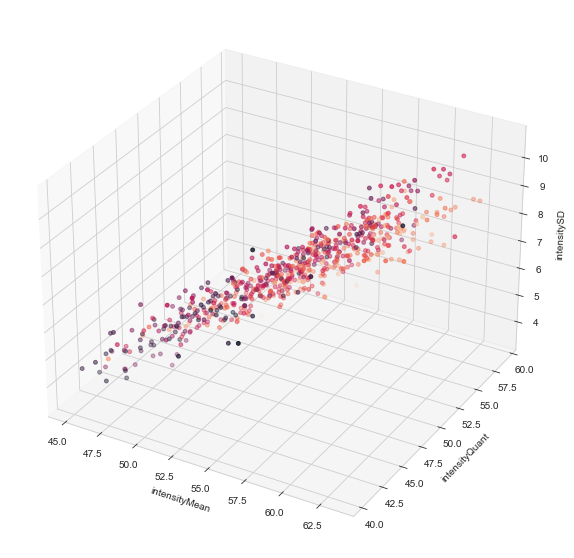

In [17]:
plt.figure(figsize=(10,10))
ax=plt.axes(projection='3d')

ax.scatter(prosody_data['intensityMean'],prosody_data['intensityQuant'],prosody_data['intensitySD'],c=prosody_data['RecommendHiring'],s=15)

ax.set_xlabel('intensityMean')
ax.set_ylabel('intensityQuant')
ax.set_zlabel('intensitySD')
plt.show()

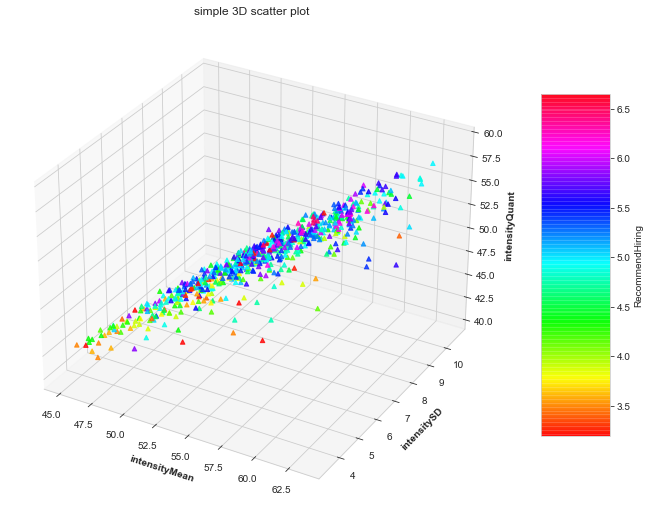

In [159]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = prosody_data['intensityQuant']
x = prosody_data['intensityMean']
y = prosody_data['intensitySD']
 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = prosody_data['RecommendHiring'],
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('intensityMean', fontweight ='bold')
ax.set_ylabel('intensitySD', fontweight ='bold')
ax.set_zlabel('intensityQuant', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7,label = 'RecommendHiring', aspect = 5)

# show plot


plt.show()

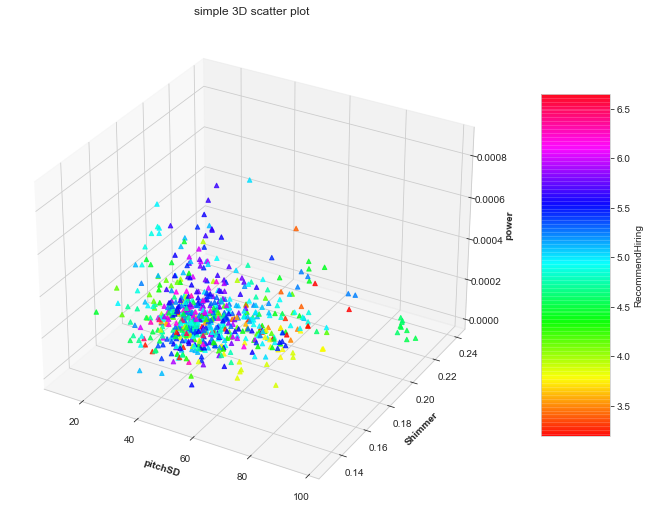

In [158]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['shimmer']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))

ax = plt.axes(projection ="3d")

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map 
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = prosody_data['RecommendHiring'],
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitchSD', fontweight ='bold')
ax.set_ylabel('Shimmer', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
fig.colorbar(sctt, shrink = 0.7, label = 'RecommendHiring',aspect = 5)

# show plot


plt.show()

arr = prosody_data['Hired']
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Selected')
    else:
        arrLB.append('NotSelected')
x=np.array(arrLB)
lb = (np.unique(x))

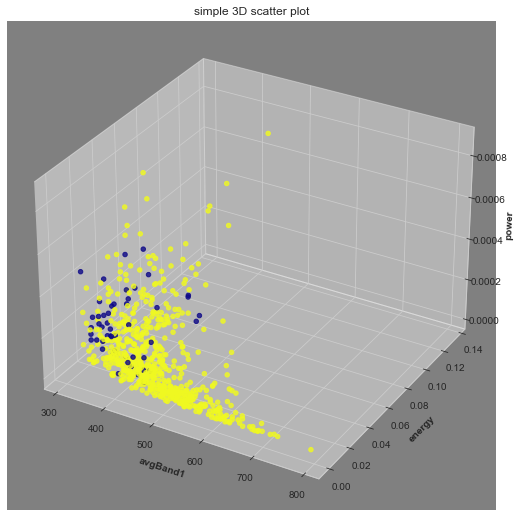

Text(0.5, 0, 'Energy')

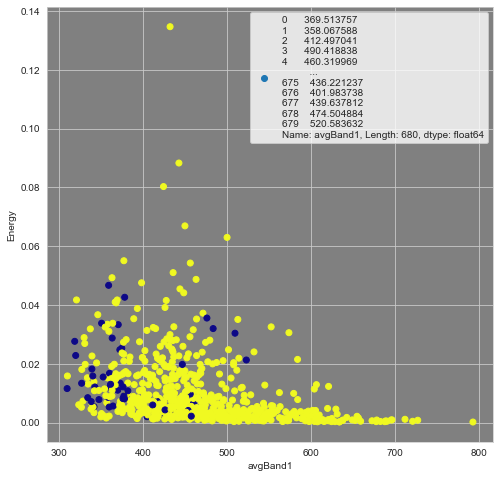

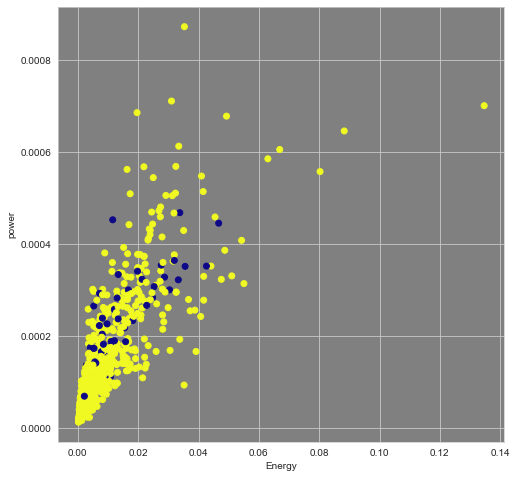

In [17]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data



 
# Creating dataset

x = prosody_data['avgBand1']
y = prosody_data['energy']
z = prosody_data['power']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = prosody_data['Hired'],
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('avgBand1', fontweight ='bold')
ax.set_ylabel('energy', fontweight ='bold')
ax.set_zlabel('power', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)

plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=prosody_data['Hired'], cmap= 'plasma_r',label=x)
plt.ylabel('Energy')
plt.xlabel('avgBand1')
plt.legend()


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=prosody_data['Hired'], cmap= 'plasma_r')
plt.ylabel('power')
plt.xlabel('Energy')


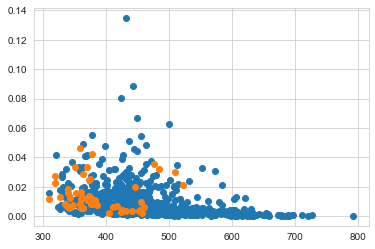

In [131]:
data = pd.DataFrame({"X Value": x, "Y Value": y, "Hired": prosody_data['Hired']})
groups = data.groupby("Hired")
for name, group in groups:
    plt.plot(group["X Value"], group["Y Value"], marker="o", linestyle="", label=name )

plt.show()   




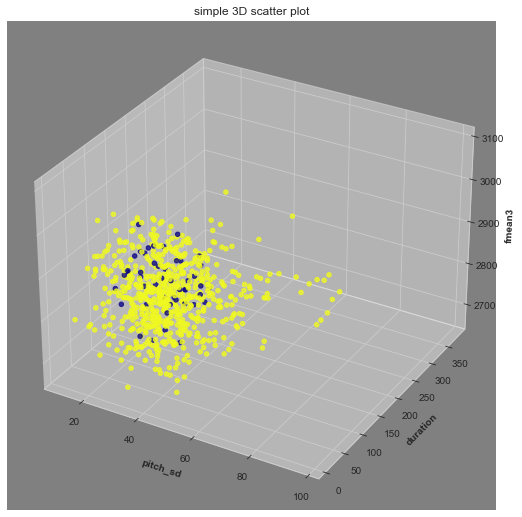

Text(0.5, 0, 'duration')

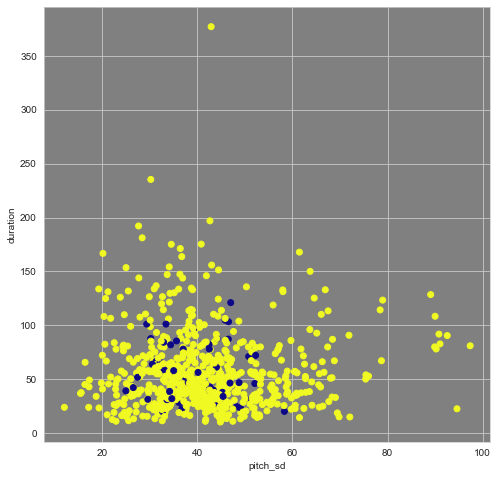

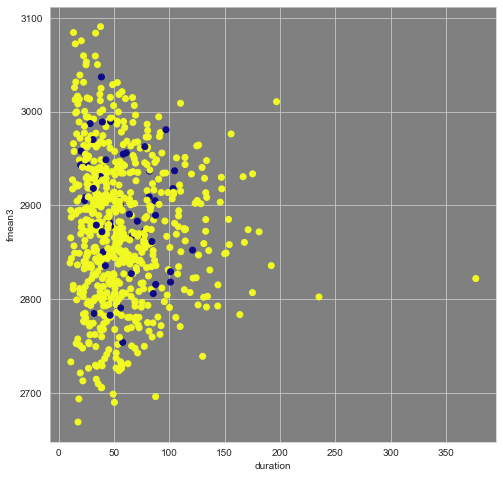

In [156]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data



 
# Creating dataset

x = prosody_data['pitch_sd']
y = prosody_data['duration']
z = prosody_data['fmean3']

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.set_facecolor("gray")  
# Add x, y gridlines
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map plasma ocean RdPu  jet PiYG OrRd GnBu RdGy  RdBu BuGn BrBG viridis
my_cmap = plt.get_cmap('plasma_r') 
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = prosody_data['Hired'],
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("simple 3D scatter plot")
ax.set_xlabel('pitch_sd', fontweight ='bold')
ax.set_ylabel('duration', fontweight ='bold')
ax.set_zlabel('fmean3', fontweight ='bold')
#fig.colorbar(sctt, shrink = 0.7, aspect = 5)
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray") 
plt.scatter(x, y, c=prosody_data['Hired'], cmap= 'plasma_r')
plt.ylabel('duration')
plt.xlabel('pitch_sd')


fig = plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("gray")  
plt.scatter(y, z, c=prosody_data['Hired'], cmap= 'plasma_r')
plt.ylabel('fmean3')
plt.xlabel('duration')


In [22]:
cor = dA.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,speakRate,PercentBreaks,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Class,Class1,Engaged1,Excited1,Friendly1,Calm1,Engaged,Excited,Friendly
duration,1.00,0.59,0.23,-0.30,0.42,-0.23,0.01,-0.15,-0.25,0.06,1.00,-0.09,0.46,0.51,0.50,-0.09,0.45,0.28,0.30,0.23,0.47,0.49,0.44,-0.14,-0.22,-0.03,-0.13,-0.12,-0.14,-0.14,-0.22,-0.03,0.02,0.14,0.10,0.31,0.13,0.11,-0.01,-0.02,0.03,-0.05,0.23,0.09,0.94,-0.67,0.28,0.97,0.37,0.10,0.98,0.93,0.57,0.57,-0.02,0.04,0.95,0.86,0.04,-0.02,0.01,0.19,0.19,-0.02,0.01,0.19,0.25,-0.02
energy,0.59,1.00,0.85,-0.02,0.36,-0.18,-0.10,-0.07,-0.20,-0.19,0.59,-0.04,0.35,0.42,0.42,0.07,0.78,0.77,0.74,0.68,0.75,0.32,0.41,-0.29,-0.25,-0.17,-0.38,-0.33,-0.29,-0.29,-0.25,-0.17,0.19,0.24,-0.02,0.26,0.03,0.20,0.06,-0.17,-0.23,-0.20,0.19,-0.18,0.50,-0.53,-0.08,0.53,0.27,0.15,0.61,0.50,0.43,0.39,0.01,-0.02,0.53,0.47,0.22,0.11,0.18,0.41,0.34,0.19,-0.04,0.43,0.24,0.13
power,0.23,0.85,1.00,0.12,0.33,-0.08,-0.12,0.02,-0.11,-0.30,0.23,0.03,0.29,0.30,0.31,0.20,0.82,0.91,0.81,0.84,0.76,0.15,0.28,-0.38,-0.27,-0.27,-0.52,-0.46,-0.36,-0.38,-0.27,-0.27,0.30,0.30,-0.16,0.17,-0.05,0.29,0.16,-0.20,-0.34,-0.24,0.10,-0.35,0.17,-0.39,-0.28,0.20,0.13,0.09,0.25,0.17,0.30,0.23,0.04,-0.02,0.19,0.20,0.32,0.24,0.30,0.47,0.39,0.28,-0.10,0.50,0.22,0.25
min_pitch,-0.30,-0.02,0.12,1.00,-0.17,0.25,-0.22,-0.14,0.25,-0.14,-0.30,0.01,-0.34,-0.36,-0.35,-0.08,0.08,0.11,0.18,0.06,0.10,-0.02,0.06,0.12,0.17,0.11,0.04,-0.02,0.02,0.12,0.17,0.11,-0.05,-0.08,-0.04,-0.08,-0.13,-0.02,-0.11,-0.21,-0.34,-0.19,-0.20,-0.12,-0.38,0.21,-0.29,-0.33,-0.04,0.08,-0.28,-0.38,-0.34,-0.36,-0.15,-0.27,-0.33,-0.42,-0.04,-0.07,0.00,0.02,-0.01,0.01,-0.10,0.05,-0.02,0.00
max_pitch,0.42,0.36,0.33,-0.17,1.00,0.32,0.36,0.36,0.28,-0.09,0.42,0.22,0.99,0.36,0.33,0.10,0.47,0.43,0.30,0.42,0.44,0.25,0.23,-0.21,-0.09,-0.03,-0.36,-0.31,-0.20,-0.21,-0.09,-0.03,0.19,0.21,-0.27,-0.06,-0.23,0.24,0.08,0.05,-0.28,0.02,-0.28,-0.20,0.40,-0.49,-0.03,0.42,0.19,0.08,0.41,0.41,0.50,0.50,0.38,0.26,0.39,0.45,0.22,0.25,0.17,0.27,0.36,0.28,-0.09,0.27,0.25,0.20
mean_pitch,-0.23,-0.18,-0.08,0.25,0.32,1.00,0.27,0.51,0.99,-0.26,-0.23,0.19,0.26,-0.77,-0.78,-0.19,-0.01,-0.01,-0.04,0.02,0.04,0.00,-0.03,0.02,0.41,0.26,-0.19,-0.01,0.03,0.02,0.41,0.26,0.23,0.10,-0.45,-0.60,-0.65,0.04,-0.18,-0.10,-0.57,-0.08,-0.98,-0.38,-0.32,0.01,-0.47,-0.25,-0.04,0.04,-0.21,-0.29,-0.47,-0.47,0.31,-0.02,-0.27,-0.31,0.15,0.07,0.15,0.09,0.29,0.45,-0.26,-0.01,0.20,0.31
pitch_sd,0.01,-0.10,-0.12,-0.22,0.36,0.27,1.00,0.66,0.24,0.55,0.01,0.25,0.38,-0.03,-0.02,0.00,-0.03,-0.13,-0.17,-0.16,-0.03,0.18,0.15,0.11,0.22,0.25,0.17,0.11,0.19,0.11,0.22,0.25,-0.01,0.00,0.11,-0.17,-0.05,-0.22,-0.21,0.75,0.31,0.75,-0.28,0.38,0.08,0.23,0.47,-0.04,0.25,0.25,0.05,0.10,0.26,0.28,0.84,0.86,-0.02,0.20,-0.15,-0.11,-0.15,-0.10,-0.07,0.09,-0.10,-0.13,0.03,0.01
pitch_abs,-0.15,-0.07,0.02,-0.14,0.36,0.51,0.66,1.00,0.50,-0.12,-0.15,0.27,0.37,-0.26,-0.27,0.10,0.03,0.10,-0.05,0.21,0.01,-0.11,-0.20,-0.22,0.01,0.03,-0.29,-0.18,-0.12,-0.22,0.01,0.03,0.28,0.28,-0.34,-0.41,-0.38,0.06,0.02,0.45,-0.05,0.44,-0.50,-0.26,0.00,-0.02,-0.12,-0.10,-0.16,-0.19,-0.16,0.04,0.07,0.08,0.82,0.67,-0.04,0.12,0.18,0.11,0.16,0.12,0.26,0.30,-0.14,0.04,0.15,0.20
pitch_quant,-0.25,-0.20,-0.11,0.25,0.28,0.99,0.24,0.50,1.00,-0.27,-0.25,0.19,0.23,-0.79,-0.82,-0.18,-0.06,-0.06,-0.08,-0.02,-0.02,-0.03,-0.07,0.02,0.40,0.25,-0.16,0.01,0.05,0.02,0.40,0.25,0.23,0.10,-0.43,-0.61,-0.64,0.01,-0.20,-0.12,-0.58,-0.10,-0.97,-0.38,-0.33,0.02,-0.48,-0.

<AxesSubplot:xlabel='Hired', ylabel='power'>

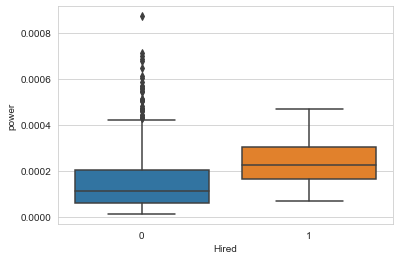

In [23]:
sns.boxplot(x='Hired', y='power',data= prosody_data)

<AxesSubplot:xlabel='Hired', ylabel='avgBand1'>

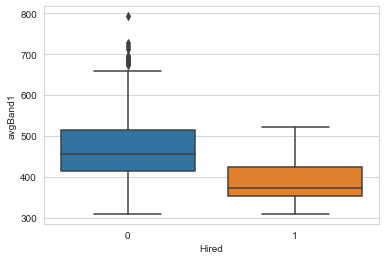

In [24]:
sns.boxplot(x='Hired', y='avgBand1',data= prosody_data)

<AxesSubplot:xlabel='Hired', ylabel='pitch_sd'>

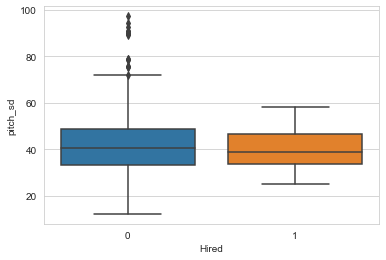

In [25]:
sns.boxplot(x='Hired', y='pitch_sd',data= prosody_data)

Hr1 = np.array(prosody_data['RecommendHiring'].value_counts())
arrLB1 = []
arr1 = prosody_data['RecommendHiring']
for i in arr1:http://localhost:8888/notebooks/Hire%20Prediction.ipynb#
    if(i >= .5 and i< 1.5):
        arrLB1.append('RecommendHiring = 1')
    elif(i >= 1.5 and i< 2.5):
        arrLB1.append('RecommendHiring = 2')
    elif(i >= 2.5 and i< 3.5):
        arrLB1.append('RecommendHiring = 3')
    elif(i >= 3.5 and i< 4.5):
        arrLB1.append('RecommendHiring = 4')
    elif(i >= 4.5 and i< 5.5):
        arrLB1.append('RecommendHiring = 5')
    elif(i >= 5.5 and i< 6.5):
        arrLB1.append('RecommendHiring = 6')
    elif(i >= 6.5 and i< 7.5):
        arrLB1.append('RecommendHiring = 7')
    else:
        arrLB.append('RecommendHiring = 8')
    
x=np.array(arrLB1)
print(x)
lb = (np.unique(x))
print(lb)
plt.rcParams.update({'figure.figsize':[12,12],'font.size':16})
plt.pie(Hr1,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

Text(0.5, 1.0, 'Percentage %')

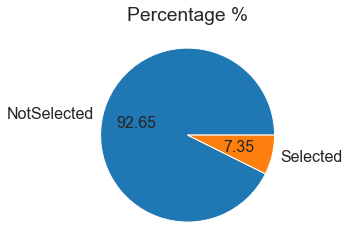

In [26]:
Hr = np.array(prosody_data['Hired'].value_counts())
arr = prosody_data['Hired']
arrLB = []
for i in arr:
    if(i==0):
        arrLB.append('Selected')
    else:
        arrLB.append('NotSelected')
x=np.array(arrLB)
lb = (np.unique(x))
plt.rcParams.update({'font.size':16})#figure.figsize':[10,10],
plt.pie(Hr,labels = lb, autopct = '%0.2f')
plt.title("Percentage %")

# Select Features Using Lasso

In [27]:
prosody_data_X = prosody_data.drop(['participant&question','Hired','Hired2','RecommendHiring'],axis=1)
prosody_data_y = prosody_data['RecommendHiring']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)

In [29]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

In [30]:
from sklearn.linear_model import Lasso 
from sklearn.model_selection import cross_val_score

In [31]:
lasso = Lasso(alpha=.5)
lasso.fit(X_train, y_train)

cross_val_score(lasso, prosody_data_X , prosody_data_y,cv=3)

array([0.09054196, 0.09553552, 0.20053601])

In [32]:
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), prosody_data_X)
rankDict = {}
rankDict = ranks['Lasso']
rankDict

{'duration': 0.868101445680389,
 'energy': 0.0,
 'power': 0.0,
 'min_pitch': 0.0,
 'max_pitch': 0.0,
 'mean_pitch': 0.0,
 'pitch_sd': 0.7341140212132552,
 'pitch_abs': 0.0,
 'pitch_quant': 0.0,
 'pitchUvsVRatio': 0.0,
 'Time:8': 0.03258610000333423,
 'iDifference': 0.06767182852769965,
 'diffPitchMaxMin': 0.11401240653733129,
 'diffPitchMaxMean': 0.0,
 'diffPitchMaxMode': 0.07582549142269669,
 'intensityMin': 0.0,
 'intensityMax': 0.0,
 'intensityMean': 0.0,
 'intensitySD': 0.0,
 'intensityQuant': 0.0,
 'diffIntMaxMin': 0.0,
 'diffIntMaxMean': 0.0,
 'diffIntMaxMode': 0.0,
 'avgVal1': 0.0,
 'avgVal2': 0.010113389357713014,
 'avgVal3': 0.00977979469166512,
 'avgBand1': 1.0,
 'avgBand2': 0.015977599521050805,
 'avgBand3': 0.026015070068027207,
 'fmean1': 0.0,
 'fmean2': 0.0,
 'fmean3': 0.3028634622828009,
 'f2meanf1': 0.0,
 'f3meanf1': 0.0,
 'f1STD': 0.0,
 'f2STD': 0.14627846493869792,
 'f3STD': 0.08365539197338165,
 'f2STDf1': 0.0,
 'f2STDf2': 0.0,
 'jitter': 0.0,
 'shimmer': 0.0,
 'jitt

In [33]:
selectedFeatures_Lasso = []

selectedFeatures_Lasso = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


selectedFeatures_Lasso_10 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<10):
        selectedFeatures_Lasso_10.append(key)
        i+=1
        
selectedFeatures_Lasso_20 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<20):
        selectedFeatures_Lasso_20.append(key)
        i+=1
        
selectedFeatures_Lasso_30 = []
i=0
for key in selectedFeatures_Lasso.keys():
    if(i<30):
        selectedFeatures_Lasso_30.append(key)
        i+=1
print("Top 10 Selected Features Using Lasso:",selectedFeatures_Lasso_10 )
 
print("\n\n\nTop 20 Selected Features Using Lasso:",selectedFeatures_Lasso_20 )

print("\n\n\nTop 30 Selected Features Using Lasso:",selectedFeatures_Lasso_30 )
  
#selectedFeatures_Lasso.keys()

Top 10 Selected Features Using Lasso: ['avgBand1', 'duration', 'pitch_sd', 'fmean3', 'MaxFalling:3', 'f2STD', 'diffPitchMaxMin', 'f3STD', 'diffPitchMaxMode', 'iDifference']



Top 20 Selected Features Using Lasso: ['avgBand1', 'duration', 'pitch_sd', 'fmean3', 'MaxFalling:3', 'f2STD', 'diffPitchMaxMin', 'f3STD', 'diffPitchMaxMode', 'iDifference', 'Time:8', 'avgBand3', 'avgBand2', 'avgVal2', 'avgVal3', 'numFall', 'energy', 'power', 'min_pitch', 'max_pitch']



Top 30 Selected Features Using Lasso: ['avgBand1', 'duration', 'pitch_sd', 'fmean3', 'MaxFalling:3', 'f2STD', 'diffPitchMaxMin', 'f3STD', 'diffPitchMaxMode', 'iDifference', 'Time:8', 'avgBand3', 'avgBand2', 'avgVal2', 'avgVal3', 'numFall', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'diffPitchMaxMean', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant']


In [34]:
dA1=prosody_data[['avgBand1', 'duration', 'pitch_sd', 'fmean3', 'MaxFalling:3', 'f2STD', 'diffPitchMaxMin', 'f3STD', 'diffPitchMaxMode', 'iDifference','RecommendHiring']]
cor = dA1.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

,avgBand1,duration,pitch_sd,fmean3,MaxFalling:3,f2STD,diffPitchMaxMin,f3STD,diffPitchMaxMode,iDifference,RecommendHiring
avgBand1,1.00,-0.17,0.15,0.50,-0.09,0.17,-0.25,0.51,-0.07,0.01,-0.51
duration,-0.17,1.00,-0.01,-0.07,0.41,0.21,0.37,0.07,0.39,-0.06,0.02
pitch_sd,0.15,-0.01,1.00,0.23,0.25,-0.14,0.33,-0.02,0.05,0.14,-0.14
fmean3,0.50,-0.07,0.23,1.00,-0.08,0.10,-0.06,-0.06,-0.22,0.03,-0.12
MaxFalling:3,-0.09,0.41,0.25,-0.08,1.00,0.23,0.53,0.18,0.65,0.09,-0.02
f2STD,0.17,0.21,-0.14,0.10,0.23,1.00,-0.02,0.54,0.42,-0.08,-0.12
diffPitchMaxMin,-0.25,0.37,0.33,-0.06,0.53,-0.02,1.00,-0.14,0.59,0.09,0.15
f3STD,0.51,0.07,-0.02,-0.06,0.18,0.54,-0.14,1.00,0.37,-0.03,-0.31
diffPitchMaxMode,-0.07,0.39,0.05,-0.22,0.65,0.42,0.59,0.37,1.00,-0.01,0.01
iDifference,0.01,-0.06,0.14,0.03,0.09,-0.08,0.09,-0.03,-0.01,1.00,0.05


# Apply Nural Networks on Selected features using Lasso

In [35]:
#import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    

In [36]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [37]:
def apply_NN_Moadel(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_Lasso_No):
    scaler = MinMaxScaler()
    X=scaler.fit_transform(prosody_data[selectedFeatures_Lasso_No])
    y=prosody_data['Hired']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
    
    
    cvscores = []
        
    keras.backend.set_floatx('float64')
    
    # create model
    for train, test in kfold.split(X, y):
        model= keras.Sequential([
            keras.layers.Dense(no_of_inNeurons, input_shape=(no_of_inNeurons,), activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        # Fit the model
        clf=model.fit(X_train, y_train, epochs=no_of_epochs, batch_size=10, verbose=0)


        # evaluate the model 
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

        cvscores.append(scores[1] * 100)
        
               
        
    
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))    
    
    #Plot ROC
    
    tnser_pred = model.predict(X_test)
    # generate a no skill prediction (majority class)
    ns_pred = [0 for _ in range(len(y_test))]
    # calculate accuracy scores
    ns_auc = roc_auc_score(y_test, ns_pred)
    tnser_auc = roc_auc_score(y_test, tnser_pred)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (tnser_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_pred)
    tnser_fpr, tnser_tpr, _ = roc_curve(y_test, tnser_pred)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill' )
    plt.plot(tnser_fpr, tnser_tpr,marker='o', label='NN ' )
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
  
    
    pred1=[]
    pred=model.predict(X_test)
    for element in pred:
        if element >= 6:
            pred1.append(1)
        else:
            pred1.append(0)
    print(classification_report(y_test,pred1,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred1))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred1), annot = True,fmt='d')
    plt.show
    
    
    return (model, cvscores, tnser_fpr, tnser_tpr, tnser_auc)

cvscores_NN_10= []
(model_NN_10,cvscores_NN_10,FP_Rate_NN_10,TP_Rate_NN_10,auc_NN_10) = apply_NN_Moadel(10,18,200,selectedFeatures_Lasso_10)

cvscores_NN_20= []
(model_NN_20,cvscores_NN_20,FP_Rate_NN_20,TP_Rate_NN_20,auc_NN_20) = apply_NN_Moadel(20,18,200,selectedFeatures_Lasso_20)

cvscores_NN_30= []
(model_NN_30,cvscores_NN_30,FP_Rate_NN_30,TP_Rate_NN_30,auc_NN_30) = apply_NN_Moadel(30,24,200,selectedFeatures_Lasso_30)

In [38]:
get_ipython().run_line_magic('matplotlib', 'inline')
X20=prosody_data[selectedFeatures_Lasso_20]
X1 =prosody_data[['max_pitch',
 'pitch_sd',
 'pitchUvsVRatio',
 'diffPitchMaxMean',
 'diffPitchMaxMode',
 'intensityMean',
 'intensityQuant',
 'diffIntMaxMean',
 'avgVal1',
 'avgVal3',
 'avgBand1',
 'avgBand3',
 'fmean1',
 'fmean2',
 'f3meanf1',
 'f1STD',
 'f2STDf1',
 'jitter',
 'jitterRap',
 'percentUnvoiced',
 'PercentBreaks',
 'numPause',
 'avgDurPause',
 'AvgTotRis:3']]
y20=prosody_data['Hired']
y1=prosody_data['Hired']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=10)
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20, random_state=10)

In [39]:
def Apply_Model(model,model_name,X_train,X_test,y_train,y_test):
    
    clf = model.fit(X_train,y_train)
    pred = model.predict(X_test)            
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train,y_train)
    # predict probabilities
    m_probs = model.predict_proba(X_test)
        
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    m_auc = roc_auc_score(y_test, m_probs)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (m_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label=model_name)   
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred))
    
    if(model == svc_model):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == knn):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == rfc):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    print("Mean : ",m_Cross)
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(m_Cross), np.std(m_Cross)))
    
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt='d')
    plt.show()
    
    
    return (m_fpr, m_tpr,m_auc)
    
    

# Applying SVM

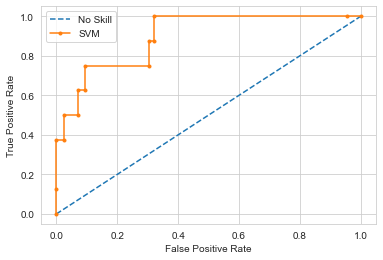

[[128   0]
 [  8   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705
Mean :  [0.92647059 0.92647059 0.92647059 0.92647059 0.92647059 0.92647059
 0.92647059 0.92647059 0.92647059 0.92647059]
CV Score  0.93% (+/- 0.00%)


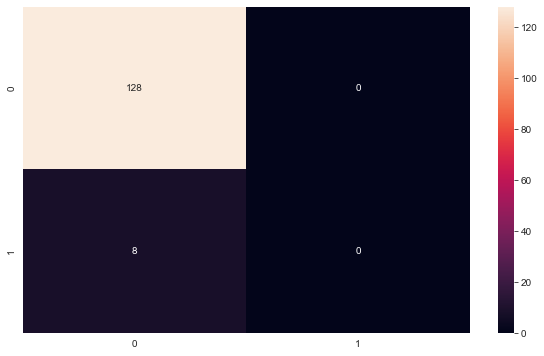

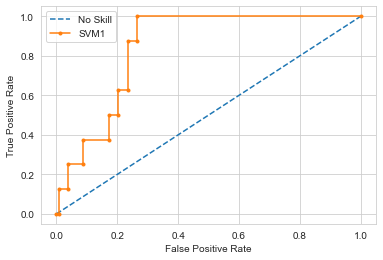

[[128   0]
 [  8   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.00      0.00      0.00         8

    accuracy                           0.94       136
   macro avg       0.47      0.50      0.48       136
weighted avg       0.89      0.94      0.91       136

MSE 0.058823529411764705
Mean :  [0.92647059 0.92647059 0.92647059 0.92647059 0.92647059 0.92647059
 0.92647059 0.92647059 0.92647059 0.92647059]
CV Score  0.93% (+/- 0.00%)


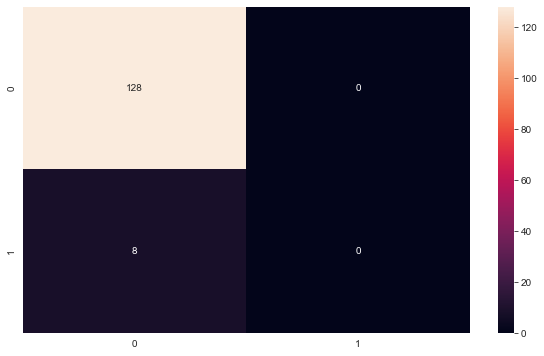

array([0.92647059, 0.92647059, 0.92647059, 0.92647059, 0.92647059,
       0.92647059, 0.92647059, 0.92647059, 0.92647059, 0.92647059])

In [40]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)

(svm_fpr, svm_tpr, svm_auc)= Apply_Model(svc_model,"SVM",X20_train, X20_test, y20_train, y20_test)
(svm_fpr1, svm_tpr1, svm_auc1)= Apply_Model(svc_model,"SVM1",X1_train, X1_test, y1_train, y1_test)

cross_val_score(SVC(gamma='auto'), X20, y20,cv=10)
#m_Cross = np.mean(cross_val_score)
#print("Mean : ",m_Cross)

# Applying KNN

Text(0, 0.5, 'Error Rate')

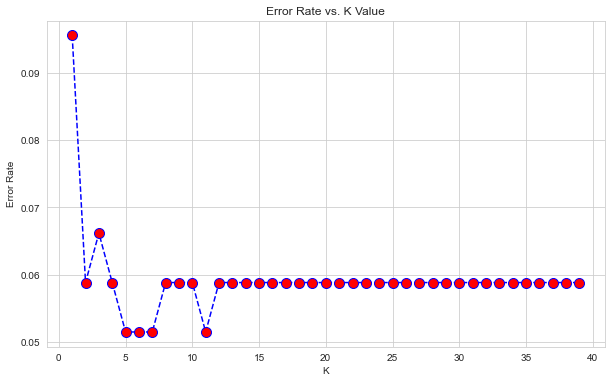

In [41]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X20_train,y20_train)
    pred_i = knn.predict(X20_test)
    error_rate.append(np.mean(pred_i != y20_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

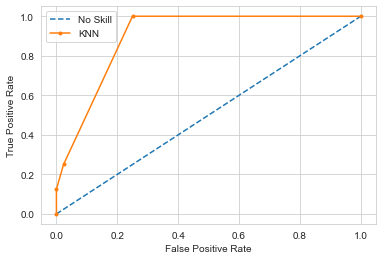

[[128   0]
 [  7   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       128
           1       1.00      0.12      0.22         8

    accuracy                           0.95       136
   macro avg       0.97      0.56      0.60       136
weighted avg       0.95      0.95      0.93       136

MSE 0.051470588235294115
Mean :  [0.92647059 0.91176471 0.92647059 0.91176471 0.91176471 0.92647059
 0.92647059 0.91176471 0.91176471 0.94117647]
CV Score  0.92% (+/- 0.01%)


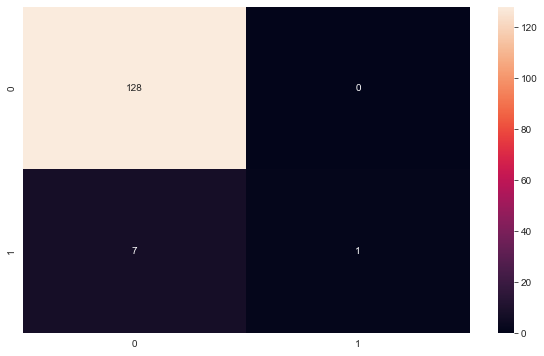

array([0.92647059, 0.91176471, 0.92647059, 0.91176471, 0.91176471,
       0.92647059, 0.92647059, 0.91176471, 0.91176471, 0.94117647])

In [42]:

knn = KNeighborsClassifier(n_neighbors=5)
(knn_fpr, knn_tpr, knn_auc)=Apply_Model(knn,"KNN",X20_train, X20_test, y20_train, y20_test)

cross_val_score(knn, X20, y20,cv=10)

# Applying Random Forest Classifier

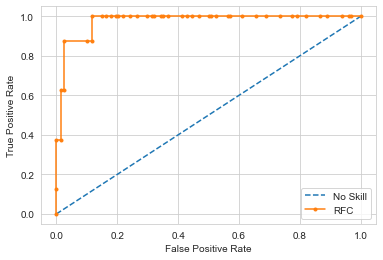

[[128   0]
 [  5   3]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       128
           1       1.00      0.38      0.55         8

    accuracy                           0.96       136
   macro avg       0.98      0.69      0.76       136
weighted avg       0.96      0.96      0.96       136

MSE 0.03676470588235294
Mean :  [0.92647059 0.92647059 0.94117647 0.92647059 0.89705882 0.92647059
 0.92647059 0.92647059 0.91176471 0.94117647]
CV Score  0.93% (+/- 0.01%)


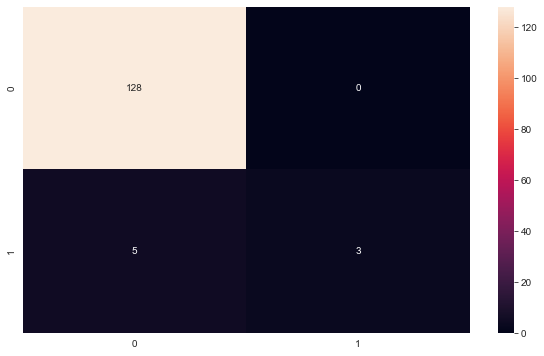

array([0.92647059, 0.92647059, 0.94117647, 0.91176471, 0.89705882,
       0.92647059, 0.92647059, 0.92647059, 0.91176471, 0.92647059])

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
(rfc_fpr, rfc_tpr, rfc_auc)=Apply_Model(rfc,"RFC",X20_train, X20_test, y20_train, y20_test)

cross_val_score(rfc, X20, y20,cv=10)


In [44]:
plt.plot(FP_Rate_NN_10,TP_Rate_NN_10, label="ANN 10, auc="+str(auc_NN_10,))
plt.plot(FP_Rate_NN_20,TP_Rate_NN_20, label="ANN 20, auc="+str(auc_NN_20,))
plt.plot(FP_Rate_NN_30,TP_Rate_NN_30, label="ANN 30, auc="+str(auc_NN_30,))

plt.plot(svm_fpr, svm_tpr, label="SVM 20, auc="+str(svm_auc))
plt.plot(knn_fpr, knn_tpr, label="KNN 20, auc="+str(knn_auc))
plt.plot(rfc_fpr, rfc_tpr, label="RFC 20, auc="+str(rfc_auc))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

NameError: name 'FP_Rate_NN_10' is not defined